# Verosimilitud de una muestra normal

Plotea la verosimilitud y todas las funciones asociadas para una muestra de datos normales.
En este ejemplo, la media μ es el parámetro desconocido y la desviación estándar σ es conocida.

In [1]:
sigma = 3.1
variance = sigma**2

## Datos

In [2]:
import numpy as np
data = np.array([14.50, 10.05, 13.82, 11.31, 13.96])

In [3]:
sample_size = len(data)
sample_size

5

In [4]:
sample_mean = np.mean(data)
sample_mean

12.728000000000002

El estimador de máxima verosimilitud es igual a la media muestral.

Varianza muestral sin corrección de Bessel ($S_n^2$):

In [5]:
sample_variance_n = np.var(data, ddof=0)
sample_variance_n

3.0065359999999997

Desviación estándar de la media muestral:

In [6]:
import math
sample_mean_sigma = sigma / math.sqrt(sample_size)
sample_mean_sigma 

1.3863621460498696

## Verosimilitud

$L({\color{red}\mu}) = \frac{1}{\left( 2 \pi \sigma^2 \right)^{n/2}} \; \exp \left( -\frac{n}{2\sigma^2} \left( s_n^2 + (\bar{x}-{\color{red}\mu})^2 \right) \right) $

Selecciono un intervalo en el espacio del parámetro μ:

In [7]:
mu_min = sample_mean - 3 * sample_mean_sigma
mu_max = sample_mean + 3 * sample_mean_sigma
mu = np.linspace(mu_min, mu_max, num=100)

In [8]:
likelihood = np.power(2*np.pi*variance, -sample_size/2) * np.exp(-sample_size/(2*variance) * (sample_variance_n + (sample_mean - mu)**2))

Text(12.728000000000002, 0.5, '  MLE')

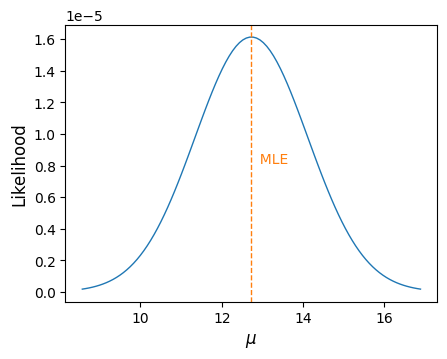

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel("$\mu$")
ax.set_ylabel("Likelihood")
ax.plot(mu, likelihood, label=r'L($\mu$)')
ax.axvline(sample_mean, ls='--', color='tab:orange')
ax.text(sample_mean, 0.5,"  MLE", transform = ax.get_xaxis_transform(), color='tab:orange')

## Logaritmo de la verosimilitud

In [10]:
log_likelihood = np.log(likelihood)

Text(12.728000000000002, 0.5, '  MLE')

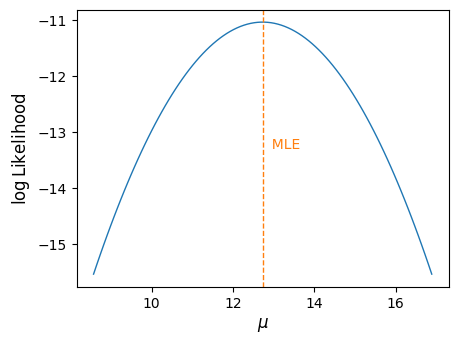

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel("$\mu$")
ax.set_ylabel("$\log$Likelihood")
ax.plot(mu, log_likelihood)
ax.axvline(sample_mean, ls='--', color='tab:orange')
ax.text(sample_mean, 0.5,"  MLE", transform = ax.get_xaxis_transform(), color='tab:orange')

Como la verosimilitud es menor a 1, su logaritmo es negativo. La verosimilitud y su logaritmo tienen el mismo máximo.

## Cociente de verosimilitudes

$\lambda(\mu) = \exp \left(-\frac{1}{2} \left( \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \right)^2 \right)$

In [12]:
likelihood_ratio = np.exp(-1/2 * ((sample_mean-mu)/sample_mean_sigma)**2)

Text(12.728000000000002, 0.5, '  MLE')

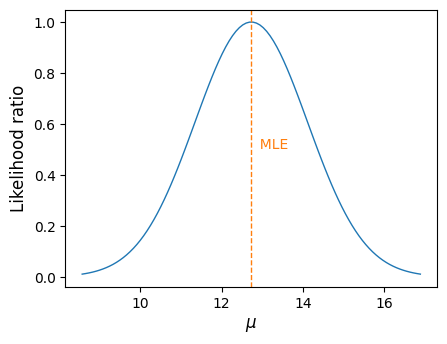

In [13]:
fig, ax = plt.subplots()
ax.set_xlabel("$\mu$")
ax.set_ylabel("Likelihood ratio")
ax.plot(mu, likelihood_ratio)
ax.axvline(sample_mean, ls='--', color='tab:orange')
ax.text(sample_mean, 0.5,"  MLE", transform = ax.get_xaxis_transform(), color='tab:orange')

El cociente de verosimilitudes (likelihood ratio en inglés) está acotado entre 0 y 1. Alcanza el máximo 1 en el estimador de máxima verosimilitud.

## Función de costo 

$ J(\mu) = \left( \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \right)^2$ 

In [14]:
cost_function = ((sample_mean-mu)/sample_mean_sigma)**2

Text(12.728000000000002, 0.5, '  MLE')

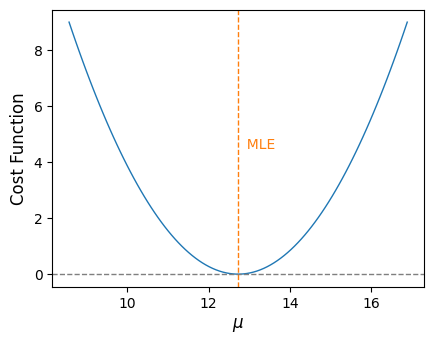

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel("$\mu$")
ax.set_ylabel("Cost Function")
ax.plot(mu, cost_function)
ax.axvline(sample_mean, ls='--', color='tab:orange')
ax.axhline(0, ls='--', color='tab:gray')
ax.text(sample_mean, 0.5,"  MLE", transform = ax.get_xaxis_transform(), color='tab:orange')

La función de costo es parabólica. Alcanza el mínimo 0 en el estimador de máxima verosimilitud. 